In [1]:
import networkx as nx
import load_data

ModuleNotFoundError: No module named 'scipy'

In [33]:
!ls

'BZR dataset analysis.ipynb'   graph_sampler.py   __pycache__
 dataset		       load_data.py	  README.md
 execution_commands.txt        main.py		  requirements.txt
 gan-env		       main_smiles.py	  results
 GCN_embedding.py	       main_Tox.py	  util.py


In [45]:
graphs = read_graphfile('./dataset/', 'Tox21_HSE_training')

No node attributes


In [52]:
for i in graphs[0].nodes()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


In [58]:
labels = {i: node_map.get(i) for i in graphs[0].nodes()}
nx.draw_networkx_nodes(graphs[0])

TypeError: draw_networkx_nodes() missing 1 required positional argument: 'pos'

KeyError: 29

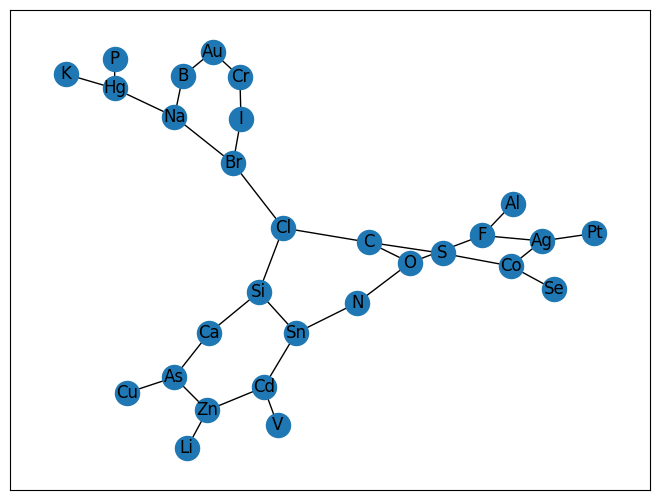

In [48]:
nx.draw(graphs[1], labels = node_map, with_labels=True)

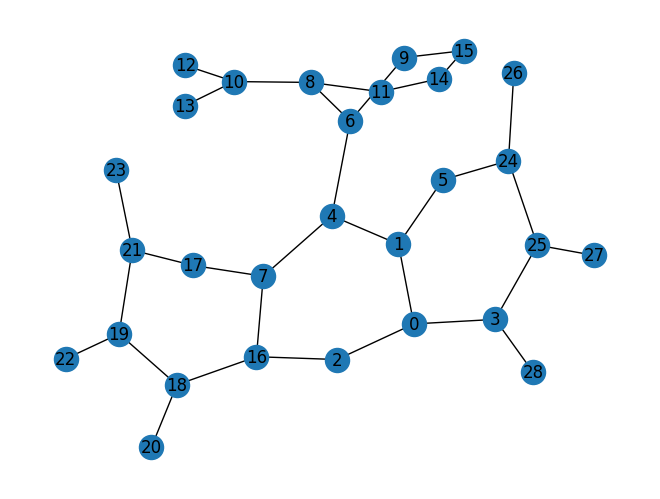

In [49]:
nx.draw(graphs[1],with_labels=True)

In [15]:
import networkx as nx
import numpy as np
import scipy as sc
import os
import re

import util

def get_node_map():
    activities = """0	O
    1	C
    2	N
    3	F
    4	Cl
    5	S
    6	Br
    7	Si
    8	Na
    9	I
    10	Hg
    11	B
    12	K
    13	P
    14	Au
    15	Cr
    16	Sn
    17	Ca
    18	Cd
    19	Zn
    20	V
    21	As
    22	Li
    23	Cu
    24	Co
    25	Ag
    26	Se
    27	Pt
    28	Al
    29	Bi
    30	Sb
    31	Ba
    32	Fe
    33	H
    34	Ti
    35	Tl
    36	Sr
    37	In
    38	Dy
    39	Ni
    40	Be
    41	Mg
    42	Nd
    43	Pd
    44	Mn
    45	Zr
    46	Pb
    47	Yb
    48	Mo
    49	Ge
    50	Ru
    51	Eu
    52	Sc
    53	Gd"""

    node_map = {i.split('\t')[0].strip() : i.split('\t')[1].strip() for i in activities.split("\n")}

    return node_map

def read_graphfile_viz(datadir, dataname, max_nodes=None):
    prefix = os.path.join(datadir, dataname, dataname)
    filename_graph_indic = prefix + '_graph_indicator.txt'
    graph_indic={}
    with open(filename_graph_indic) as f:
        i=1
        for line in f:
            line=line.strip("\n")
            graph_indic[i]=int(line)
            i+=1

    filename_nodes=prefix + '_node_labels.txt'
    node_labels=[]
    
    node_map = get_node_map()
    print(f"node map: {node_map}")
    
    try:
        with open(filename_nodes) as f:
            for line in f:
                line=line.strip("\n")
#                 print(line)
#                 node_labels+=[int(line) - 1]
                # node_labels += node_map.get(line)
                node_labels += line
#         print(node_labels)
        num_unique_node_labels = len(set(node_labels))
    except IOError:
        print('No node labels')
 
    filename_node_attrs=prefix + '_node_attributes.txt'
    node_attrs=[]
    try:
        with open(filename_node_attrs) as f:
            for line in f:
                line = line.strip("\s\n")
                attrs = [float(attr) for attr in re.split("[,\s]+", line) if not attr == '']
                node_attrs.append(np.array(attrs))
    except IOError:
        print('No node attributes')
       
    label_has_zero = False
    filename_graphs=prefix + '_graph_labels.txt'
    graph_labels=[]

    label_vals = []
    with open(filename_graphs) as f:
        for line in f:
            line=line.strip("\n")
            val = int(line)
            if val not in label_vals:
                label_vals.append(val)
            graph_labels.append(val)

    label_map_to_int = {val: i for i, val in enumerate(label_vals)}
    graph_labels = np.array([label_map_to_int[l] for l in graph_labels])

    filename_adj=prefix + '_A.txt'
    adj_list={i:[] for i in range(1,len(graph_labels)+1)}    
    index_graph={i:[] for i in range(1,len(graph_labels)+1)}
    num_edges = 0
    with open(filename_adj) as f:
        for line in f:
            line=line.strip("\n").split(",")
            e0,e1=(int(line[0].strip(" ")),int(line[1].strip(" ")))
            adj_list[graph_indic[e0]].append((e0,e1))
            index_graph[graph_indic[e0]]+=[e0,e1]
            num_edges += 1
    for k in index_graph.keys():
        index_graph[k]=[u-1 for u in set(index_graph[k])]
    
    
    graphs=[]
    for i in range(1,1+len(adj_list)):
        G=nx.from_edgelist(adj_list[i])
        G.graph['label'] = graph_labels[i-1]
        for u in util.node_iter(G):
            if len(node_labels) > 0:
                # node_label_one_hot = { node_lbl: 0 for node_lbl in range(num_unique_node_labels)}
                node_label = node_labels[u-1]
                # node_label_one_hot[node_label] = 1
                util.node_dict(G)[u]['label'] = node_label
            if len(node_attrs) > 0:
                util.node_dict(G)[u]['feat'] = node_attrs[u-1]
        if len(node_attrs) > 0:
            G.graph['feat_dim'] = node_attrs[0].shape[0]
        # print(node_labels)
        print(G.nodes())
        print(G.edges())
        print(G.nodes)
        nx.draw(G, with_labels=True)
        break
        mapping={}
        it=0
        for n in util.node_iter(G):
            mapping[n]=it
            it+=1
            
        graphs.append(nx.relabel_nodes(G, mapping))
    return graphs

node map: {'0': 'O', '1': 'C', '2': 'N', '3': 'F', '4': 'Cl', '5': 'S', '6': 'Br', '7': 'Si', '8': 'Na', '9': 'I', '10': 'Hg', '11': 'B', '12': 'K', '13': 'P', '14': 'Au', '15': 'Cr', '16': 'Sn', '17': 'Ca', '18': 'Cd', '19': 'Zn', '20': 'V', '21': 'As', '22': 'Li', '23': 'Cu', '24': 'Co', '25': 'Ag', '26': 'Se', '27': 'Pt', '28': 'Al', '29': 'Bi', '30': 'Sb', '31': 'Ba', '32': 'Fe', '33': 'H', '34': 'Ti', '35': 'Tl', '36': 'Sr', '37': 'In', '38': 'Dy', '39': 'Ni', '40': 'Be', '41': 'Mg', '42': 'Nd', '43': 'Pd', '44': 'Mn', '45': 'Zr', '46': 'Pb', '47': 'Yb', '48': 'Mo', '49': 'Ge', '50': 'Ru', '51': 'Eu', '52': 'Sc', '53': 'Gd'}
[2, 1, 6, 20, 3, 14, 4, 21, 5, 7, 11, 22, 8, 12, 9, 10, 23, 24, 13, 25, 15, 19, 16, 26, 17, 27, 18, 28, 29, 30]
[(2, 1), (2, 3), (2, 14), (1, 6), (1, 20), (6, 5), (6, 22), (3, 4), (3, 21), (4, 5), (4, 7), (5, 11), (7, 8), (7, 12), (11, 10), (11, 25), (8, 9), (12, 15), (12, 19), (9, 10), (9, 23), (9, 24), (10, 13), (15, 16), (15, 26), (19, 18), (19, 30), (16, 1

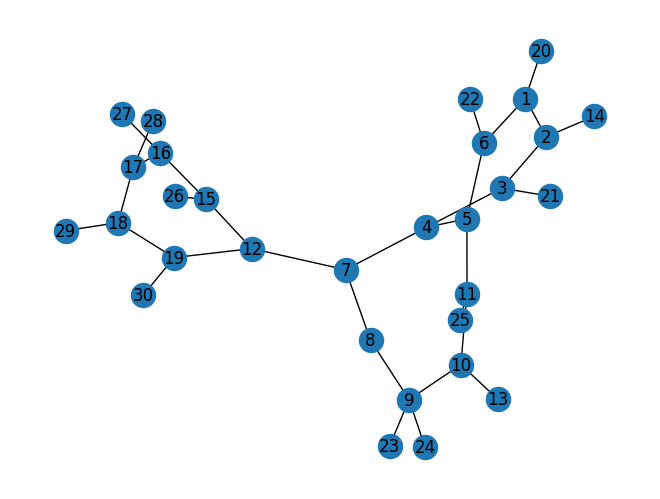

In [16]:
node_map = get_node_map()
graphs = read_graphfile_viz('dataset', dataname='BZR')

In [12]:
graphs[0].edges()

IndexError: list index out of range

KeyError: 24

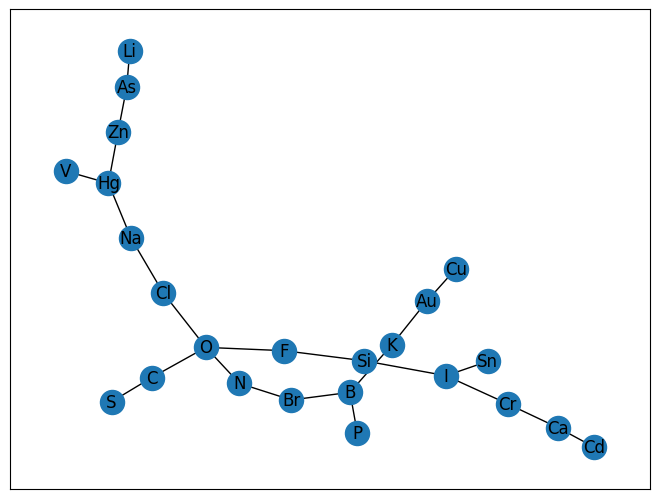

In [64]:
nx.draw(graphs[8149], labels=node_map, with_labels=True)